**Introduction** 

Le présent rapport fait suite à la formation reçue dans le cadre du Certificat Data Science. Il a pour but de répondre à  un certain de nombre de questions qui nous ont été posées en vue d’évaluer nos connaissances dans le domaine de la data science, et s’articule pour cela autours de deux tâches principales. 
La première tâche consiste à faire de la prévision de sentiment à partir d’avis de clients tirés d’une base de produits Amazon. Elle fait donc appel aux technique de machine learning dont la finalité est de construire un modèle de prédiction après traitement et analyse du texte contenant les avis de l’ensemble des clients. 
La seconde tâche vise quant à elle à appliquer les méthodes du Big Data pour faire du WordCount sous les environnements Linux et Data bricks. Elle est aussi réalisée à partir de la base de données des produits Amazon plus haut cité et contenant trois variables : le nom du produit (name), l’avis du client (review) et son sentiment du produit (sentiment). 


**Plan de la première parie**

(1) Construction de l'ensemble des caractéristiques (Nettoyage des données, compréhension des mots)

(2) Méthodologie de sélection des données (Naïve, stratifiée, boostrap) 

(3) Présentation des méthodes d'apprentissage (Arbre de décision, Random forest, SVM)

Chargement des librairies

In [ ]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

**Première Partie**

1. **Construction de l'ensemble des caractéristiques**

Chargement des données 

In [ ]:
Produits = pd.read_csv('pr_10k.csv',     # Chargement de la base de données 
                        sep = ';',
                       header = 0, 
                       engine = 'python')

Produits                                 # Présentation de la base 

,name,review,sentiment
0,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt,positive
1,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"This is a product well worth the purchase. I have not found anything else like this, and it is a positive, ingenious approach to losing the binky. What I love most about this product is how much...",positive
2,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"All of my kids have cried non-stop when I tried to ween them off their pacifier, until I found Thumbuddy To Love's Binky Fairy Puppet. It is an easy way to work with your kids to allow them to un...",positive
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"When the Binky Fairy came to our house, we didn't have any special gift and book to help explain to her about how important it is to stop using a pacifier. This book does a great job to help prepa...",positive
4,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not be able to add alot of photos/cards aside from the designated spaces in the book. Shop around before you purchase, as it is currently listed at Barne...",positive
...,...,...,...
9994,Prince lionheart Ever-Fresh Replacement Pillow,The price is right and shipping is fast. I love the product about as much as one can love a wipes warmer accessory.,positive
9995,Prince lionheart Ever-Fresh Replacement Pillow,"I really enjoy being able to have a wipe warmer, and my daughters appreciate it as well! I find it a little inconvenient to have to buy more of the pillows. It would be nice if that wasn't neces...",positive
9996,Prince lionheart Ever-Fresh Replacement Pillow,I bought these as replacements for the pad which came with my wipe warmer when I received it as a gift after the birth of my baby. These serve their purpose only if you remember to keep them moist...,positive
9997,Prince lionheart Ever-Fresh Replacement Pillow,"This work awesome, been using them in my warmer for 7 months. Over 7 months I have gone through 4 pads. Just make sure you rewet them every couple days.",positive


In [ ]:
Produits[Produits['sentiment'] == 'positive'].head(2)  #Présentation de l’ensemble des données pour les 2 premiers sentiments positifs  

,name,review,sentiment
0,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt,positive
1,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"This is a product well worth the purchase. I have not found anything else like this, and it is a positive, ingenious approach to losing the binky. What I love most about this product is how much...",positive


Traitements préliminaires et Nettoyages des données 

Exploration des données manquantes 

In [ ]:
Produits.isnull().sum()   #Nombre d'observations manquantes par variables 

name          3
review       23
sentiment     0
dtype: int64

In [ ]:
Pdts = Produits[Produits["review"].notnull()] #Elimination des valeurs manquantes pour la variable avis

In [ ]:
print(Pdts.shape) #Nouvelle dimention de la base de données 

(9976, 3)


In [ ]:
Pdts.isnull().sum() #Nombre d'observations mamquantes par variables

name         3
review       0
sentiment    0
dtype: int64

In [ ]:
Pdts["sentiment"].value_counts()

positive    7869
negative    2107
Name: sentiment, dtype: int64

([<matplotlib.axis.XTick at 0x7f4b56c5b610>,
 [Text(0, 0, 'negative'), Text(0, 0, 'positive')])

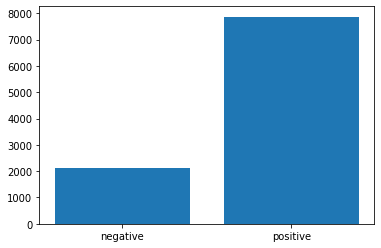

In [ ]:
x = np.arange(2)
plt.bar(x, height=[2107,7869])
plt.xticks(x, ['negative','positive'])

In [ ]:
import plotly.express as px 
import numpy 
freq_sentiment = [2107, 7869] 
mod_sentiment = ['negative', 'positive'] 
  
fig = px.pie(values=freq_sentiment, names=mod_sentiment) 
fig.show()

Nettoyage des données 

Elimination des ponctuations, des nombres et des caractères spéciaux 

In [ ]:
Pdts['review'] = Pdts['review'].str.replace("[^a-zA-Z#]", " ")
Pdts.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,review,sentiment
0,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks fit the full size bed perfectly would recommend to anyone looking for this type of quilt,positive
1,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,This is a product well worth the purchase I have not found anything else like this and it is a positive ingenious approach to losing the binky What I love most about this product is how much...,positive
2,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,All of my kids have cried non stop when I tried to ween them off their pacifier until I found Thumbuddy To Love s Binky Fairy Puppet It is an easy way to work with your kids to allow them to un...,positive
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,When the Binky Fairy came to our house we didn t have any special gift and book to help explain to her about how important it is to stop using a pacifier This book does a great job to help prepa...,positive
4,A Tale of Baby's Days with Peter Rabbit,Lovely book it s bound tightly so you may not be able to add alot of photos cards aside from the designated spaces in the book Shop around before you purchase as it is currently listed at Barne...,positive


Elimination des mots courts 

In [ ]:
Pdts['review'] = Pdts['review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Observation de quelques lignes du dataframe

In [ ]:
Pdts.head()

,name,review,sentiment
0,Annas Dream Full Quilt with 2 Shams,Very soft comfortable warmer than looks full size perfectly would recommend anyone looking this type quilt,positive
1,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,This product well worth purchase have found anything else like this positive ingenious approach losing binky What love most about this product much ownership daughter getting binky proud herself l...,positive
2,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,kids have cried stop when tried ween them their pacifier until found Thumbuddy Love Binky Fairy Puppet easy work with your kids allow them understand where their pacifier going help them part from...,positive
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,When Binky Fairy came house didn have special gift book help explain about important stop using pacifier This book does great help prepare your child loss their favorite item doll adorable made lo...,positive
4,A Tale of Baby's Days with Peter Rabbit,Lovely book bound tightly able alot photos cards aside from designated spaces book Shop around before purchase currently listed Barnes Noble,positive


Tokenisation des avis

In [ ]:
tokenized_review = Pdts['review'].apply(lambda x: x.split()) # tokenizing

In [ ]:
tokenized_review.head()

0                                                                                [Very, soft, comfortable, warmer, than, looks, full, size, perfectly, would, recommend, anyone, looking, this, type, quilt]
1    [This, product, well, worth, purchase, have, found, anything, else, like, this, positive, ingenious, approach, losing, binky, What, love, most, about, this, product, much, ownership, daughter, get...
2    [kids, have, cried, stop, when, tried, ween, them, their, pacifier, until, found, Thumbuddy, Love, Binky, Fairy, Puppet, easy, work, with, your, kids, allow, them, understand, where, their, pacifi...
3    [When, Binky, Fairy, came, house, didn, have, special, gift, book, help, explain, about, important, stop, using, pacifier, This, book, does, great, help, prepare, your, child, loss, their, favorit...
4                                         [Lovely, book, bound, tightly, able, alot, photos, cards, aside, from, designated, spaces, book, Shop, around, before, purchase, currently

Normalisation ou racinisation des avis 

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Réintégration de la variable review dans le dataframe

In [ ]:
Pdts = Pdts.replace(['review'], 'tokenized_review')  

In [ ]:
Pdts.head(2)

,name,review,sentiment
0,Annas Dream Full Quilt with 2 Shams,Very soft comfortable warmer than looks full size perfectly would recommend anyone looking this type quilt,positive
1,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,This product well worth purchase have found anything else like this positive ingenious approach losing binky What love most about this product much ownership daughter getting binky proud herself l...,positive


La compréhensions des mots communs utilisés dans les avis : WordCloud 

L'une des manières de voir la distribution des sentiments dans l'ensemble des données est de tracer des nuages de mots.  

Un nuage de mots est une visualisation dans laquelle les mots les plus fréquents apparaissent en grande taille et les mots moins fréquents en plus petites tailles. 

Mots plus fréquents dans l'ensemble des avis

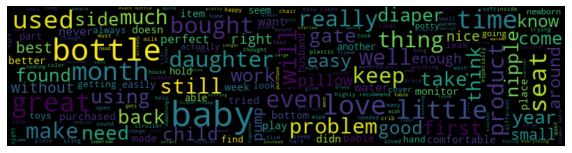

In [ ]:
all_words = ' '.join([text for text in Pdts['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=200, random_state=21, max_font_size=50).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Mots plus fréquents liés aux avis négatifs 

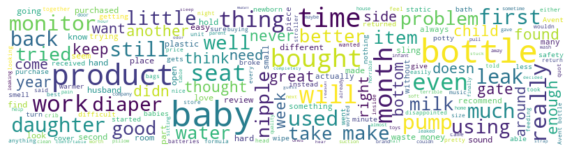

In [ ]:
negative_words =' '.join([text for text in Pdts['review'][Pdts['sentiment'] == 'negative']])

wordcloud = WordCloud(background_color="white", width=800, height=200, random_state=21, max_font_size=50).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Mots plus fréquents liés aux avis positifs 

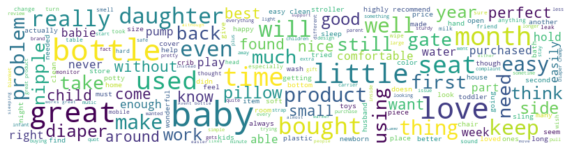

In [ ]:
positive_words =' '.join([text for text in Pdts['review'][Pdts['sentiment'] == 'positive']])

wordcloud = WordCloud(background_color="white", width=800, height=200, random_state=21, max_font_size=50).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Extraction des caractéristiques des avis nettoyés 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(Pdts['review'])
bow.shape

(9976, 1000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(Pdts['review'])
tfidf.shape

(9976, 1000)

2. Méthodologie de sélection des données pour l'**apprentissage** et pour le **test**:

Nous présenterons trois approches de répartition des données: d'abord les répartitions naïve et stratifiée où le sous-échantillon d’entrainement constitue (2/3) de la population et celui de test (1/3). Ensuite, l'approche (boostrap) dans lequel  l’échantillon est subdivisé en 10 sous-échantillons dont à chaque fois (9/10) de l’échantillon  est utilisé pour l’entrainement et (1/10) pour le test. 
La répartition des sentiments dans la variable sentiment peut être, par ailleurs, aussi déterminante pour la stratégie à adopter dans le choix de sous échantillons d’entrainement et de test. Nous procédons donc à son analyse.  



La Sélection **naïve** :
la répartition naïve veut que l’on tire de manière aléatoire 66% des observations de notre échantillon total qui constituerons notre sous-échantillon d’entrainement tandis que le reste (33%), sera utilisé pour tester le modèle que nous aurons choisi d’entrainer. 

In [ ]:
# Sélection des échantions pour l'apprentissage et le test : Option 1
from sklearn.model_selection import train_test_split 
XTrain, XTest, yTrain, yTest = train_test_split(tfidf, Pdts['sentiment'], train_size = 0.66, random_state = 42)

In [ ]:
#print(XTrain, yTrain)
print(XTest, yTest)

  (0, 778)	0.34765271137456155
  (0, 596)	0.3007267636022822
  (0, 458)	0.270224438353633
  (0, 434)	0.2998723308900592
  (0, 924)	0.30029792898691804
  (0, 375)	0.33370099827745914
  (0, 242)	0.33526752901568513
  (0, 149)	0.3200463623386377
  (0, 345)	0.17245196331694382
  (0, 450)	0.2474432656321784
  (0, 877)	0.1942860299101381
  (0, 912)	0.2379199578089752
  (0, 478)	0.1551332796207953
  (1, 51)	0.23533841928329707
  (1, 770)	0.2176260037110859
  (1, 901)	0.275988433394998
  (1, 965)	0.16891272405930183
  (1, 13)	0.2426158086511857
  (1, 444)	0.21082025687110106
  (1, 911)	0.26304170972594276
  (1, 890)	0.20342253576802147
  (1, 62)	0.15676974892905532
  (1, 288)	0.2594311250367587
  (1, 728)	0.19769496429341796
  (1, 136)	0.2017114240565892
  :	:
  (3390, 414)	0.11420165695128259
  (3390, 983)	0.06917923618194836
  (3391, 74)	0.20607321209360094
  (3391, 616)	0.14653110913406403
  (3391, 707)	0.18675371224545217
  (3391, 571)	0.18522224531638337
  (3391, 572)	0.17701557381595603


In [ ]:
print('échantillon apprentissage')
freqTrain = pd.crosstab(index=yTrain, columns="count")
print(freqTrain/freqTrain.sum())
print()
print('échantillon test')
freqTest = pd.crosstab(index=yTest, columns="count")
print(freqTest/freqTest.sum())

échantillon apprentissage
col_0         count
sentiment          
negative   0.207928
positive   0.792072

échantillon test
col_0         count
sentiment          
negative   0.217571
positive   0.782429


La sélection **stratifiée** : permet de maintenir des structures pour les sous-échantillons d’entrainement et de test  conforment à celle de  notre échantillon d’origine. 

In [ ]:
# Sélection des échantions pour l'apprentissage et le test
from sklearn.model_selection import train_test_split      
XTrain1, XTest1= train_test_split(Pdts, train_size=0.66,random_state=42,stratify=Pdts['sentiment'])

In [ ]:
print(XTrain1)

                                                                                  name  ... sentiment
6888                           The First Year's Infant To Toddler Tub with Sling, Blue  ...  positive
1806                     Playtex Drop-Ins Original BPA Free Nurser Newborn Starter Set  ...  positive
1222                                                        Munchkin Mozart Magic Cube  ...  positive
7787                                                    2-in-1 Car Seat Cover `n Carry  ...  positive
8146                                         Prince Lionheart 2 Stage Seatsaver, Black  ...  positive
...                                                                                ...  ...       ...
4611          Playtex 3 Pack BPA Free VentAire Wide Bottles, 9 Ounce (Colors may vary)  ...  positive
8938  The First Years 4 Pack Take And Toss Spill Proof Cups, 10 Ounce, Colors May Vary  ...  positive
1168                                                        Munchkin Mozart Magic 

In [ ]:
print(XTest1)

                                                                                     name  ... sentiment
3474                                         Playtex Diaper Genie - First Refill Included  ...  negative
1524                                Graco TotBloc Pack 'N Play with Carry Bag, Bugs Quilt  ...  positive
5483  Philips AVENT Hard Spout Magic Trainer with Handle, 9 Ounce, Twin (Colors May Vary)  ...  negative
3374                                                          PRIMO EuroBath, Pearl White  ...  positive
95                Newborn Baby Tracker&reg, - Round the Clock Childcare Journal, Log Book  ...  positive
...                                                                                   ...  ...       ...
4007                                      SoftShells Breast Shell Soothers - Sore Nipples  ...  positive
2367                                                     The First Years - Crib CD Player  ...  positive
2646                                                   

In [ ]:
print('échantillon apprentissage')
freqTrain1 = pd.crosstab(index=XTrain1['sentiment'],columns="count")
print(freqTrain1/freqTrain1.sum())
print()
print('Echantillon test')  
freqTest1 = pd.crosstab(index=XTest1['sentiment'],columns="count")
print(freqTest1/freqTest1.sum())

échantillon apprentissage
col_0        count
sentiment         
negative   0.21127
positive   0.78873

Echantillon test
col_0         count
sentiment          
negative   0.211085
positive   0.788915


La sélection **boostrap** : peut toutefois sembler être la bonne méthode pour l’entrainement des données et leur test. Elle utilise le **k-fold Cross validation** (CV) qui peut constituer une solution au problème précision lié à l'échantillonnage en divisant la base en sous-échantillons et en s’assurant de l’utilisation de chaque sous-échantillon comme ensemble test à un moment donné.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(XTrain1['review'])
tfidf.shape

(6584, 1000)

In [ ]:
XTrain=tfidf
print(XTrain.shape)

(6584, 1000)


In [ ]:
XTest=tfidf_vectorizer.transform(XTest1['review'])
XTest.shape

(3392, 1000)

In [ ]:
yTrain=XTrain1['sentiment']
yTest=XTest1['sentiment']
print(yTrain.shape)
print(yTest.shape)

(6584,)
(3392,)


3.	Présentation, entrainement et évaluation des méthodes d’apprentissage

L’objectif de notre travail est de construire un modèle qui nous permette de prédire avec une meilleure précision la classe des avis ne faisant pas partie de l’ensemble de nos données. Pour ce faire, il nous faut entrainer des modèles à partir de notre échantillon d’apprentissage pour ensuite les tester à l’aide de l’échantillon test. Nous avons choisi comme méthodes d’apprentissage celles dites d’apprentissage supervisé que sont : l’arbre de décision, les Support Vector Machines (SVM) et le random forest (Foret aléatoire). 

**Forêts aléatoires ou random forest**

L’idée derrière la méthode random forest est qu’elle fait pousser de nombreux arbres de classification simple. Ainsi pour classer un objet à partir d’un vecteur d’entrée, on place le vecteur d’entrée dans chacun des arbres de la forêt. Chaque arbre donne une classification, et on dit que l’arbre « vote » pour cette classe. Au final, la forêt choisit la classification ayant le plus de votes sur tous les arbres de la forêt.  

In [ ]:
# Random forest sans Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#clf_RF= AdaBoostClassifier(RandomForestClassifier(n_estimators=100, max_depth=2), algorithm="SAMME", n_estimators=150)
clf_RF=RandomForestClassifier(n_estimators=100)
clf_RF.fit(XTrain,yTrain)
#print(clf_RF.feature_importances_)

RandomForestClassifier()

Metrics

In [ ]:
from sklearn.metrics import classification_report 

predTest_RF = clf_RF.predict(XTest)
from sklearn import metrics
            
#Accuracy
print('Accuracy=%f' %metrics.accuracy_score(yTest,predTest_RF))
print('Report : ')
print(classification_report(yTest, predTest_RF))

print('la matrice de confusion est :')
pd.crosstab(yTest, predTest_RF, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy=0.858491
Report : 
              precision    recall  f1-score   support

    negative       0.80      0.44      0.57       716
    positive       0.87      0.97      0.92      2676

    accuracy                           0.86      3392
   macro avg       0.83      0.71      0.74      3392
weighted avg       0.85      0.86      0.84      3392

la matrice de confusion est :


Predicted,negative,positive,All
True,,,
negative,315,401,716
positive,79,2597,2676
All,394,2998,3392


**Arbre de décision**

L’apprentissage par arbre de décision est l’une des approches de modélisation prédictive utilisées en statistiques, en exploration des données (data mining) et en apprentissage automatisé (machine learning). Il utilise un arbre de décision (en tant que modèle prédictif) pour passer des observations sur un élément (représentés dans les branches) aux conclusions sur la valeur cible de l’élément (représenté dans les feuilles). Les modèles arborescents où la variable cible peut prendre un ensemble discret de valeurs sont appelés arbre de classification ; dans ces structures arborescentes, les feuilles représentent les étiquettes de classe et les branches représentent les conjonctions de caractéristiques qui mènent à ces étiquettes de classe. Les arbres de décisions dans lesquels la variable cible peut prendre des valeurs continues (généralement des nombres réels) sont appelés arbres de régression. Les arbres de décisions font partie des algorithmes d’apprentissage automatique les plus populaires en raison de leur intelligibilité et de leur simplicité.  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf_AD=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=5), algorithm="SAMME", n_estimators=100)
clf_AD.fit(XTrain,yTrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(min_samples_leaf=5),
                   n_estimators=100)

Metrics

In [ ]:
from sklearn.metrics import classification_report 

predTest_AD = clf_AD.predict(XTest)
from sklearn import metrics
            
#Accuracy
print('Accuracy=%f' %metrics.accuracy_score(yTest,predTest_AD))
print('Report : ')
print(classification_report(yTest, predTest_AD))

print('la matrice de confusion est :')
pd.crosstab(yTest, predTest_AD, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy=0.861144
Report : 
              precision    recall  f1-score   support

    negative       0.77      0.49      0.60       716
    positive       0.88      0.96      0.92      2676

    accuracy                           0.86      3392
   macro avg       0.82      0.72      0.76      3392
weighted avg       0.85      0.86      0.85      3392

la matrice de confusion est :


Predicted,negative,positive,All
True,,,
negative,349,367,716
positive,104,2572,2676
All,453,2939,3392


ROC

In [ ]:
from sklearn.metrics import roc_curve
y_pred = clf_AD.predict(XTest)
y_proba = clf_AD.predict_proba(XTest)
#print(y_proba, y_pred)

fpr_cl = dict()
tpr_cl = dict()
fpr_cl["classe 0"], tpr_cl["classe 0"], _ = roc_curve(
    yTest == 'negative', y_proba[:, 0].ravel())
fpr_cl["classe 1"], tpr_cl["classe 1"], _ = roc_curve(
    yTest== 'positive', y_proba[:, 1].ravel())  # y_test == 1

prob_pred = np.array([y_proba[i, 1 if c else 0]
                         for i, c in enumerate(y_pred)])
fpr_cl["tout"], tpr_cl["tout"], _ = roc_curve(
    (y_pred == yTest).ravel(), prob_pred)

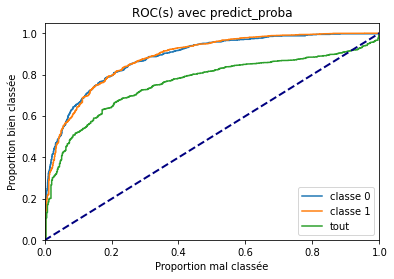

In [ ]:
plt.figure()
for key in fpr_cl:
    plt.plot(fpr_cl[key], tpr_cl[key], label=key)

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC(s) avec predict_proba')
plt.legend(loc="lower right")

**SVM**

Parmi les méthodes d’apprentissage, le SVM est une méthode offrant une précision très élevée par rapport à d’autres classificateurs tels que la régression logistique et même les arbres de décision. Cette méthode est connu pour son astuce de noyau pour gérer les espaces d’entrée non linéaire. Il est utilisé dans une variété d’applications telles que la détection des visages, la détection des intrusions, la classification des gènes etc. A partir de l’algorithme SVM, le classificateur sépare les ponts de données en utilisant un hyperplan avec la plus grande marge. C’est pourquoi un classificateur SVM est également connu comme un classificateur discriminant. Le SVM trouve un hyperplan optimal qui aide à classer les nouveaux points données.  


In [ ]:
from sklearn.svm import SVC
#from sklearn.ensemble import AdaBoostClassifier
#class_SVC= AdaBoostClassifier(SVC(kernel='linear'), algorithm="SAMME", n_estimators=150)
clf_SVC= SVC(kernel='linear')
#class_SVC= SVC(kernel='sigmoid') # sigmoid, poly, degree=2
clf_SVC.fit(XTrain,yTrain)

SVC(kernel='linear')

Metrics

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
predTest_SVC= clf_SVC.predict(XTest)
print('Accuracy=%f' %metrics.accuracy_score(yTest,predTest_SVC))
print('Report : ')
print(classification_report(yTest, predTest_SVC))

print('la matrice de confusion est :')
pd.crosstab(yTest, predTest_SVC, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy=0.867040
Report : 
              precision    recall  f1-score   support

    negative       0.77      0.53      0.63       716
    positive       0.88      0.96      0.92      2676

    accuracy                           0.87      3392
   macro avg       0.83      0.74      0.77      3392
weighted avg       0.86      0.87      0.86      3392

la matrice de confusion est :


Predicted,negative,positive,All
True,,,
negative,380,336,716
positive,115,2561,2676
All,495,2897,3392


AUC et ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



AUC=0.905016


Text(0.5, 1.0, 'ROC(s) avec decision_function')

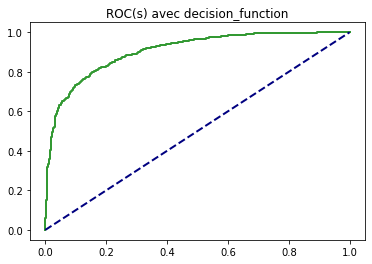

In [ ]:
pred=clf_SVC.decision_function(XTest.todense())
#print(pred)
fpr_SVC,tpr_SVC, thresholds =roc_curve(yTest,pred,pos_label="positive")
plt.plot(fpr_SVC, tpr_SVC, color='green',
label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (1, 2),
        lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
print('AUC=%f' %metrics.auc(fpr_SVC, tpr_SVC))
plt.title('ROC(s) avec decision_function')